**author**: lukethompson@gmail.com<br>
**date**: 24 Nov 2016<br>
**language**: Python 3.5<br>
**conda enviroment**: emp-py3<br>
**license**: unlicensed<br>

## alpha_diversity_boxplots.ipynb

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import empcolors

In [2]:
colors = ['white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white']
sns.set_palette(colors)

In [3]:
path_map = '/Users/luke/emp/metadata-refine/emp_qiime_mapping_qc_filtered.tsv'
path_adiv = '/Users/luke/emp/analyses-adiv/emp.90.min25.deblur.withtax.onlytree_5000.txt'
path_nsti_ko = '/Users/luke.thompson/emp/analyses-picrust/nsti_per_sample.tsv'
path_savefig = '/Users/luke/emp/analyses-adiv'

In [4]:
def boxplot_jitter_sorted(df, x_cat, y_cat, sub_cat, sub_value, y_max):
    myfontsize = 14
    fig = plt.figure(figsize=(8.7, 5)) # df[x_cat][df[sub_cat] == sub_value].value_counts().shape[0]
    sns.boxplot(fliersize=0, x=x_cat, y=y_cat, data=df[df[sub_cat] == sub_value], order=df[df[sub_cat] == sub_value].groupby([x_cat]).mean().sort_values(by=y_cat).index.tolist())
    sns.stripplot(jitter=True, x=x_cat, y=y_cat, data=df[df[sub_cat] == sub_value], order=df[df[sub_cat] == sub_value].groupby([x_cat]).mean().sort_values(by=y_cat).index.tolist(), color='black', size=1)
    plt.xticks(rotation=45, ha='right', fontsize=myfontsize)
    plt.yticks(fontsize=myfontsize)
    plt.xlabel('Sample type (%s)' % x_cat, fontsize=myfontsize)
    plt.ylim(0, y_max)
    if (y_cat == 'observed_otus'):
        plt.ylabel('Observed OTUs', fontsize=myfontsize) # (identical 90-bp V4 16S rRNA)
    plt.tight_layout()
    fig.patch.set_alpha(0.0)
    plt.savefig('%s/%s_%s_%s.pdf' % (path_savefig, y_cat, x_cat, sub_value))

In [5]:
# import files
df_map = pd.read_csv(path_map, sep='\t', index_col=0)
df_adiv = pd.read_csv(path_adiv, sep='\t', index_col=0)
df_nsti_ko = pd.read_csv(path_nsti_ko, sep='\t', index_col=0)

/Users/luke.thompson/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (27,28,29,30,31,32,33,34,35,36,37,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# calculate and add percent Greengenes and Silva coverage
df_map['Greengenes v.13.8'] = df_map['observations_closed_ref_greengenes']/df_map['sequences_split_libraries']
df_map['Silva v.123'] = df_map['observations_closed_ref_silva']/df_map['sequences_split_libraries']

In [7]:
# merge mapping df and adiv df and remove controls
df_merged_adiv = pd.merge(df_map, df_adiv, how='inner', left_index=True, right_index=True)
df_merged_adiv = df_merged_adiv[df_merged_adiv['empo_1'] != 'Control']

In [8]:
# merge mapping df and nsti_ko scores
df_merged_nsti_ko = pd.merge(df_map, df_nsti_ko, how='inner', left_index=True, right_index=True)
df_merged_nsti_ko = df_merged_nsti_ko[df_merged_nsti_ko['empo_1'] != 'Control']

### Alpha diversity

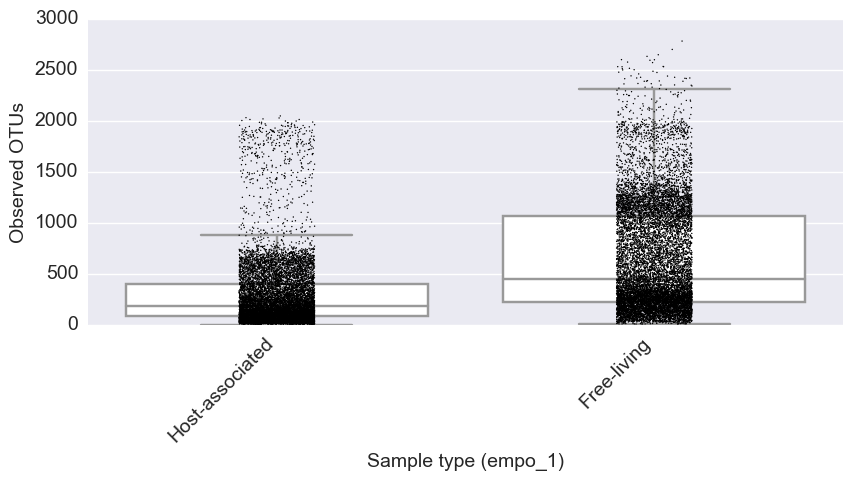

In [9]:
# empo_1 boxplots
boxplot_jitter_sorted(df=df_merged_adiv, x_cat='empo_1', y_cat='observed_otus', 
                      sub_cat='empo_0', sub_value='EMP sample', y_max=3000)

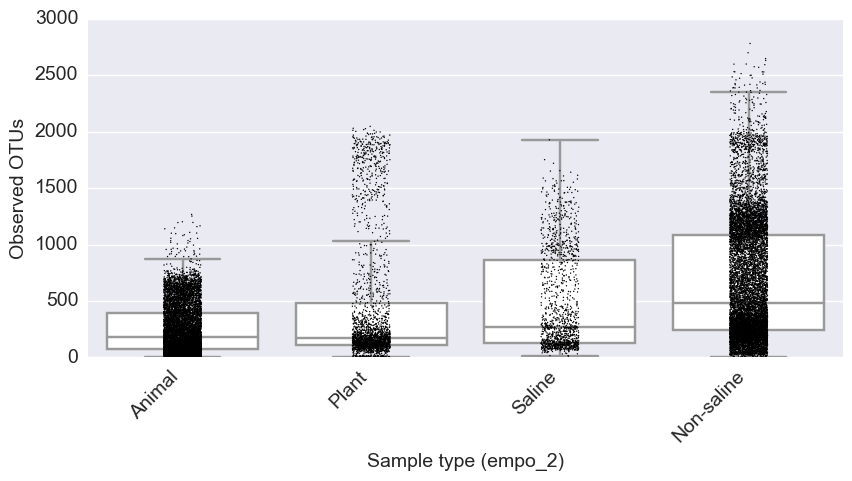

In [10]:
# empo_2 boxplots
boxplot_jitter_sorted(df=df_merged_adiv, x_cat='empo_2', y_cat='observed_otus', 
                      sub_cat='empo_0', sub_value='EMP sample', y_max=3000)

#### empo_3 free-living

In [11]:
# Warning: color palette assumes specific order of box plot!
colorsFL = [empcolors.get_empo_cat_color('Water (saline)'), 
          empcolors.get_empo_cat_color('Aerosol (non-saline)'), 
          empcolors.get_empo_cat_color('Hypersaline (saline)'), 
          'white', 
          empcolors.get_empo_cat_color('Surface (saline)'), 
          empcolors.get_empo_cat_color('Water (non-saline)'), 
          empcolors.get_empo_cat_color('Sediment (saline)'), 
          empcolors.get_empo_cat_color('Soil (non-saline)'), 
          empcolors.get_empo_cat_color('Sediment (non-saline)'), 
          'white', 
          'white', 
          'white']
sns.set_palette(colorsFL)

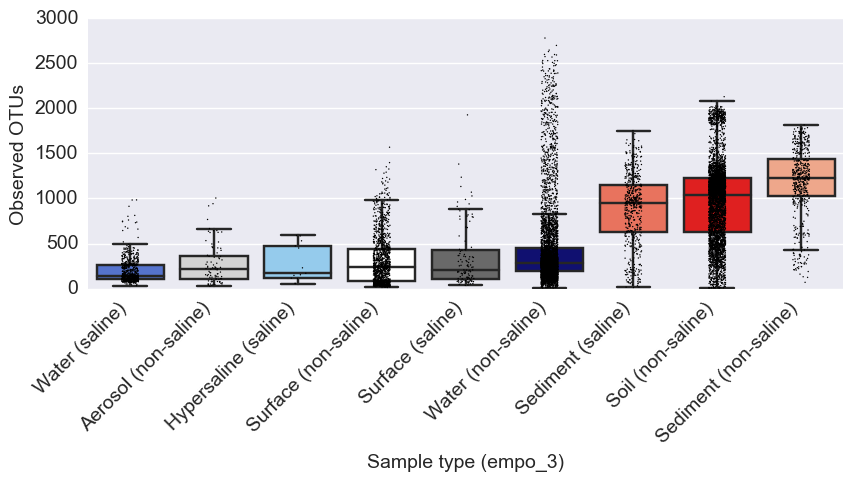

In [12]:
boxplot_jitter_sorted(df=df_merged_adiv, x_cat='empo_3', y_cat='observed_otus', 
                      sub_cat='empo_1', sub_value='Free-living', y_max=3000)

#### empo_3 host-associated

In [13]:
# Warning: color palette assumes specific order of box plot!
colorsHA = [empcolors.get_empo_cat_color('Animal corpus'), 
          empcolors.get_empo_cat_color('Plant corpus'), 
          empcolors.get_empo_cat_color('Animal secretion'), 
          empcolors.get_empo_cat_color('Plant surface'), 
          empcolors.get_empo_cat_color('Animal proximal gut'), 
          empcolors.get_empo_cat_color('Animal surface'), 
          empcolors.get_empo_cat_color('Animal distal gut'), 
          empcolors.get_empo_cat_color('Plant rhizosphere'), 
          'white', 
          'white', 
          'white', 
          'white']
sns.set_palette(colorsHA)

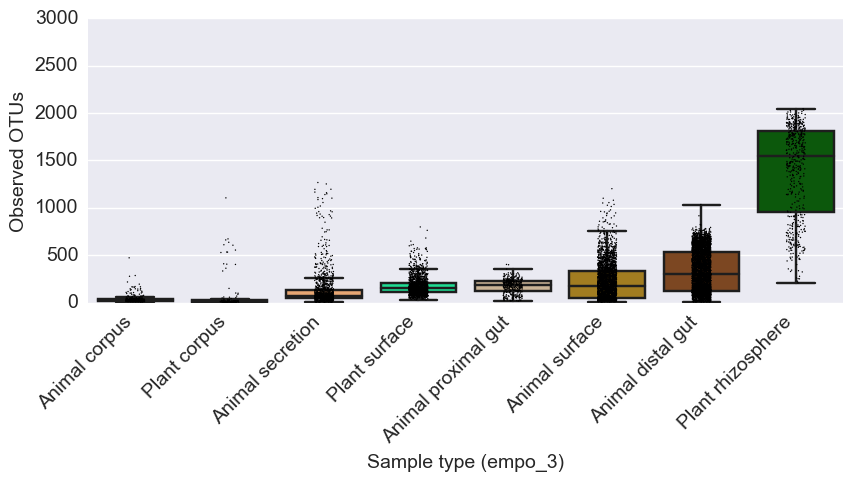

In [14]:
boxplot_jitter_sorted(df=df_merged_adiv, x_cat='empo_3', y_cat='observed_otus', 
                      sub_cat='empo_1', sub_value='Host-associated', y_max=3000)

### Greengenes & Silva coverage

In [15]:
df_coverage = df_map[['empo_3', 'Greengenes v.13.8', 'Silva v.123']]
df_coverage.reset_index(inplace=True)
df_coverage = pd.melt(df_coverage, id_vars=['#SampleID', 'empo_3'], value_vars=['Greengenes v.13.8', 'Silva v.123'])
df_coverage.sort_values('empo_3', inplace=True)

In [16]:
# order by mean value
boxorder = df_coverage.groupby('empo_3').quantile(0.5).sort_values('value', ascending=False).index

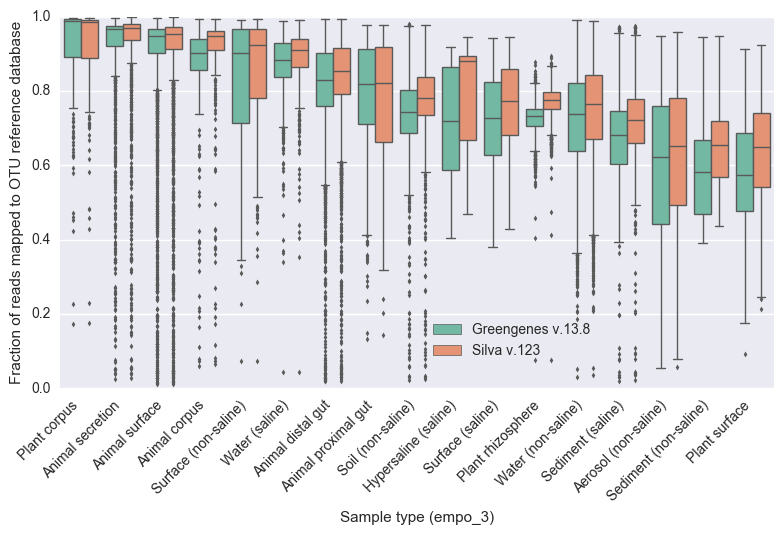

In [17]:
sns.boxplot(x='empo_3', y='value', hue='variable', data=df_coverage, fliersize=3,
            palette=sns.color_palette(['#67C3A6', '#F68C63']), linewidth=1,
            order=boxorder)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sample type (empo_3)')
plt.ylabel('Fraction of reads mapped to OTU reference database')
plt.legend(bbox_to_anchor=(0.76, 0.21))
plt.tight_layout()
plt.savefig('%s/coverage_gg_silva.pdf' % path_savefig)

### NSTI scores

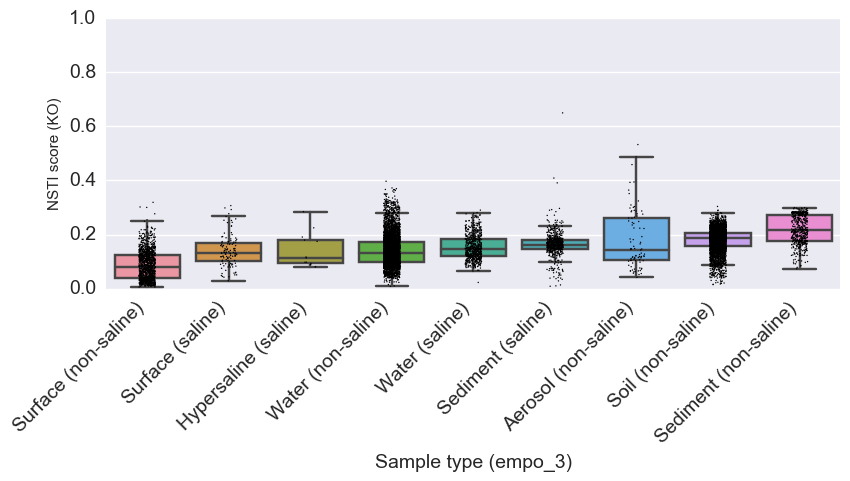

In [18]:
# nsti empo_3 boxplots (free-living)
sns.set_palette('Blues')
boxplot_jitter_sorted(df=df_merged_nsti_ko, x_cat='empo_3', y_cat='Value', 
                      sub_cat='empo_1', sub_value='Free-living', y_max=1)
plt.ylabel('NSTI score (KO)')

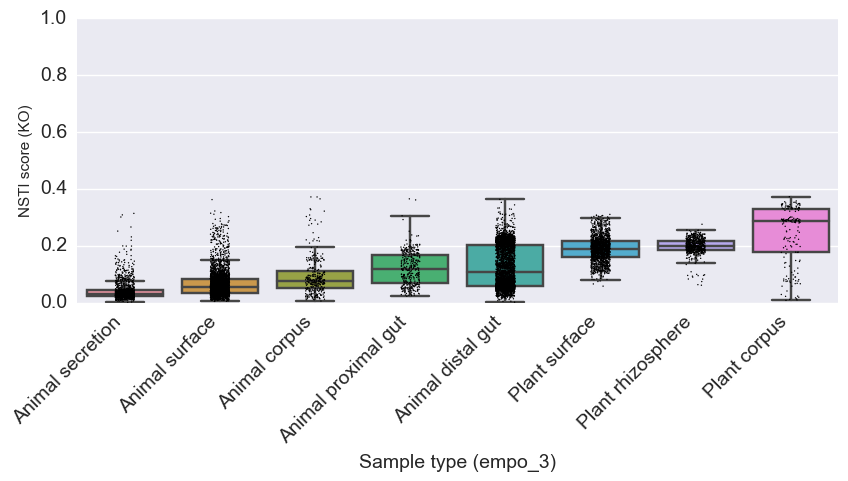

In [19]:
# nsti empo_3 boxplots (host-associated)
boxplot_jitter_sorted(df=df_merged_nsti_ko, x_cat='empo_3', y_cat='Value', 
                      sub_cat='empo_1', sub_value='Host-associated', y_max=1)
plt.ylabel('NSTI score (KO)')